<a href="https://colab.research.google.com/github/Dineshchowdary9999/Case1E2/blob/main/ml_exp7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
df=pd.read_csv("ClassifiedData.csv",index_col=0)
scaler = StandardScaler()
scaler.fit(df.drop('TARGET CLASS',axis=1))
scaled_features=scaler.transform(df.drop('TARGET CLASS',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
X_train,X_test,y_train,y_test=train_test_split(scaled_features,
df['TARGET CLASS'],test_size=0.30)
knn1=KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train,y_train)
pred1 = knn1.predict(X_test)
print("For K=1 results are:")
print(confusion_matrix(y_test,pred1))
print(classification_report(y_test,pred1))
knn23=KNeighborsClassifier(n_neighbors=23)
knn23.fit(X_train,y_train)
pred23=knn23.predict(X_test)
print("For K=23 results are:")
print(confusion_matrix(y_test,pred23))
print(classification_report(y_test,pred23))



For K=1 results are:
[[141  18]
 [  8 133]]
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       159
           1       0.88      0.94      0.91       141

    accuracy                           0.91       300
   macro avg       0.91      0.92      0.91       300
weighted avg       0.92      0.91      0.91       300

For K=23 results are:
[[141  18]
 [  2 139]]
              precision    recall  f1-score   support

           0       0.99      0.89      0.93       159
           1       0.89      0.99      0.93       141

    accuracy                           0.93       300
   macro avg       0.94      0.94      0.93       300
weighted avg       0.94      0.93      0.93       300



Text(0, 0.5, 'ErrorRate')

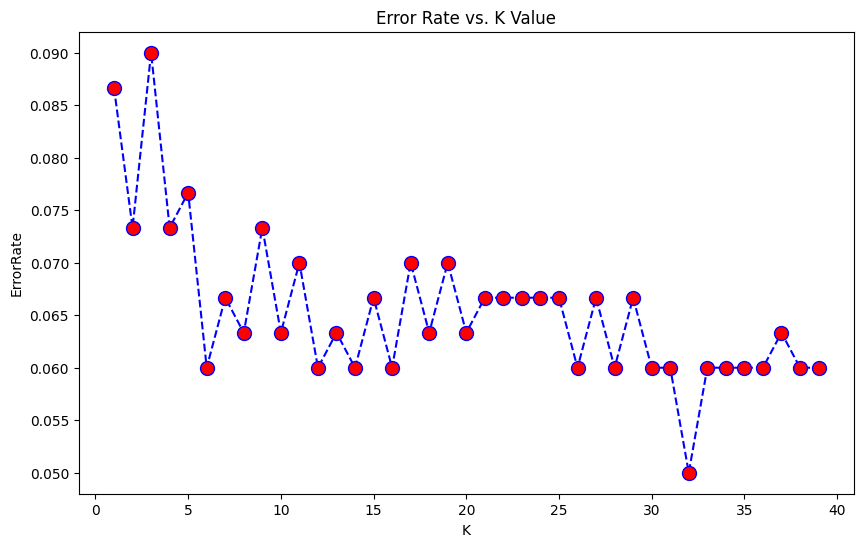

In [14]:
error_rate=[]
for i in range(1,40): # Changed 'inrange' to 'range' to iterate using a range
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',
marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('ErrorRate')
